In [1]:
"""
ANALYSIS OF lendingclub.com LOAN DATA

More than 10.000 borrowers that take loans.

"""

'\nANALYSIS OF lendingclub.com LOAN DATA\n\nMore than 10.000 borrowers that take loans.\n\n'

In [108]:
# Load packages
import numpy as np 
import pandas as pd 
import warnings

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, accuracy_score, roc_auc_score, f1_score, precision_score, roc_curve
from sklearn.preprocessing import StandardScaler,  MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV

In [3]:
#load data from the csv file
df = pd.read_csv('kaggle/loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
# Change dots in the columns names to underscores
df.columns = [c.replace(".", "_") for c in df.columns]
print(f"Number of rows/records: {df.shape[0]}")
print(f"Number of columns/variables: {df.shape[1]}")

Number of rows/records: 9578
Number of columns/variables: 14


In [5]:
# Understand the variables
variables = pd.DataFrame(columns=['Variable', 'Number of unique values', 'Number of nulls', 'Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].isnull().sum(), df[var].unique().tolist()]
    
variables.set_index('Variable')

,Number of unique values,Number of nulls,Values
Variable,,,
credit_policy,2,0,"[1, 0]"
purpose,7,0,"[debt_consolidation, credit_card, all_other, h..."
int_rate,249,0,"[0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.078..."
installment,4788,0,"[829.1, 228.22, 366.86, 162.34, 102.92, 125.13..."
log_annual_inc,1987,0,"[11.35040654, 11.08214255, 10.37349118, 11.299..."
dti,2529,0,"[19.48, 14.29, 11.63, 8.1, 14.97, 16.98, 4.0, ..."
fico,44,0,"[737, 707, 682, 712, 667, 727, 722, 677, 662, ..."
days_with_cr_line,2687,0,"[5639.958333, 2760.0, 4710.0, 2699.958333, 406..."
revol_bal,7869,0,"[28854, 33623, 3511, 33667, 4740, 50807, 3839,..."


In [6]:
"""
FEATURES
From the introduction above we know what features are available and their types. For convenience we can organize the features of the dataset in useful groups:

NUMERIC features containing numeric data
BINARY features containing binary data (0,1)
CATEGORICAL features with categorical values
LOAN features related to the loan itself
PERSON features related to the person getting the loan
TARGET the target feature for training the model
"""

'\nFEATURES\nFrom the introduction above we know what features are available and their types. For convenience we can organize the features of the dataset in useful groups:\n\nNUMERIC features containing numeric data\nBINARY features containing binary data (0,1)\nCATEGORICAL features with categorical values\nLOAN features related to the loan itself\nPERSON features related to the person getting the loan\nTARGET the target feature for training the model\n'

In [7]:
NUMERIC = ["int_rate", "installment", "log_annual_inc", "dti", "fico", "days_with_cr_line", "revol_bal", "revol_util", 
           "inq_last_6mths", "delinq_2yrs", "pub_rec"]
BINARY = ['credit_policy', 'not_fully_paid']
CATEGORICAL = ['purpose']
LOAN = ['int_rate', 'installment', 'days_with_cr_line', 'revol_bal', 'revol_util']
PERSON = ['log_annual_inc', 'dti', 'fico', 'inq_last_6mths', 'delinq_2yrs', 'pub_rec']
TARGET = ['not_fully_paid']

In [8]:
#df[TARGET] = df[TARGET].astype('category')

In [9]:
# MISSING VALUES & IMPUTATION
# OUTLIERS

df[BINARY].agg(['min', 'max'])

,credit_policy,not_fully_paid
min,0,0
max,1,1


In [10]:
df[NUMERIC].agg(['min', 'max']).round(2)

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
min,0.06,15.67,7.55,0.00,612,178.96,0,0.0,0,0,0
max,0.22,940.14,14.53,29.96,827,17639.96,1207359,119.0,33,13,5


In [11]:
"""
The ranges of each feature seem to be within the expected ranges, except for revol_bal: this range is from 0 to 1.2 milions! 
Let's examine this feature in more detail by visually showing its distribution with a boxplot:
"""

"\nThe ranges of each feature seem to be within the expected ranges, except for revol_bal: this range is from 0 to 1.2 milions! \nLet's examine this feature in more detail by visually showing its distribution with a boxplot:\n"

Text(0.5, 1.0, 'Distribution of revolving balance')

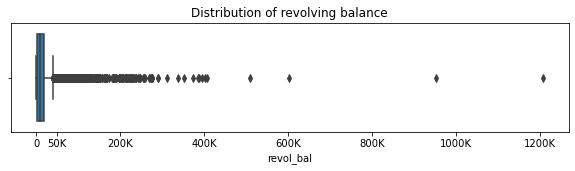

In [12]:
plt.figure(figsize=(10,2))
sns.boxplot(data=df, x='revol_bal')
plt.xticks(ticks = [0,50000,200000,400000,600000,800000,1000000,1200000], labels=['0','50K','200K','400K','600K','800K','1000K','1200K'])
plt.title("Distribution of revolving balance")

In [13]:
"""
OK, the boxplot shows that the majority of the values are certainly below 50,000 with several outliers from 50,000 to 500,000; 
there are also 4 extreme points above 500,000! There four points might be due to error or they might be real extreme cases. 
Whatever the case, they would introduce bias to further analysis and model-training. 
Since there are more than 9500 entries in total, we can drop these extreme four without loosing much information and 
explanatory power.
"""

'\nOK, the boxplot shows that the majority of the values are certainly below 50,000 with several outliers from 50,000 to 500,000; \nthere are also 4 extreme points above 500,000! There four points might be due to error or they might be real extreme cases. \nWhatever the case, they would introduce bias to further analysis and model-training. \nSince there are more than 9500 entries in total, we can drop these extreme four without loosing much information and \nexplanatory power.\n'

Text(0.5, 1.0, 'Distribution of revolving balance - without outliers')

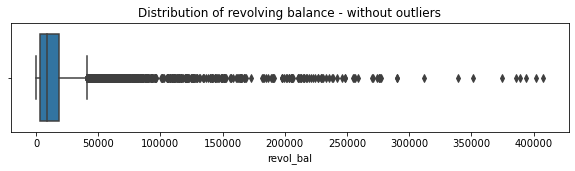

In [14]:
# get indices of the extreme outliers and drop them
indices = df[df['revol_bal'] > 500000].index
df_clean = df.drop(indices)

# check the boxplot again:
plt.figure(figsize=(10,2))
sns.boxplot(data = df_clean, x='revol_bal')
plt.title('Distribution of revolving balance - without outliers')

In [15]:
"""
Things look better now, there are still some outliers but they are not extreme and they should be useful in training our model.
"""

'\nThings look better now, there are still some outliers but they are not extreme and they should be useful in training our model.\n'

Text(0.5, 1.0, 'Count of loans by purpose')

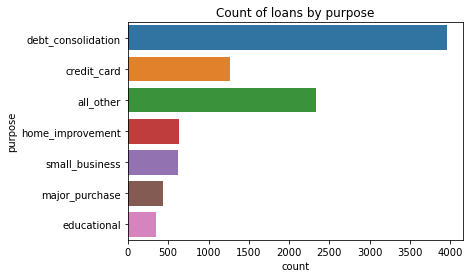

In [16]:
# THE NATURE OF LOAN
# to gain insights, we can visualize what kind of loans people get

sns.countplot(y=df_clean.purpose)
plt.xticks(None)
plt.yticks(None)
plt.title("Count of loans by purpose")

(0.0, 1.0)

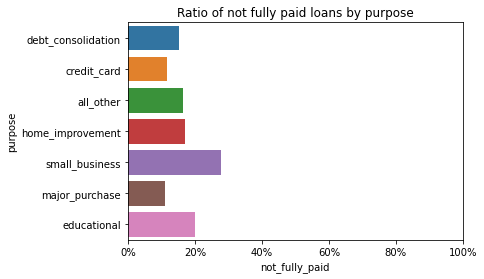

In [17]:
# Analyse how many of these loans are not fully paid back
ax = sns.barplot(y=df_clean.purpose, x=df_clean.not_fully_paid.astype('int'), ci=None)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
plt.xticks(None)
plt.yticks(None)
plt.title("Ratio of not fully paid loans by purpose")
plt.xlim(0,1)

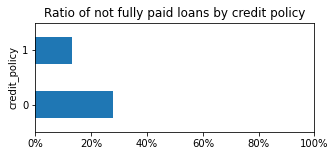

In [18]:
# Lets analyse about credit_policy
# display the ratio of not_fully_paid by credit_policy
ratio = df_clean.groupby('credit_policy')['not_fully_paid'].mean()
ax = ratio.plot.barh(figsize=(5,2), title='Ratio of not fully paid loans by credit policy')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
plt.xlim(0,1);

In [19]:
#Let's examine some of the other features in relation to whether a loan was fully paid back or not.
# function to plot visuals about the distribution of a feature by various categories of interest

def show_distribution(feature='int_rate', name='Interest Rate'):
    #define the subplot areas
    
    fig, axes = plt.subplots(1,3, figsize=(15,3))
    
    #plot the boxplots by purpose
    sns.boxplot(data=df_clean, x=feature, y='purpose', ax=axes[0], )
    axes[0].set_ylabel("")
    axes[0].set_xlabel(name)
    axes[0].set_title(name+" by loan purpose")
    #plot the boxplots by not_fully_paid
    y= df_clean.not_fully_paid.astype('category')
    sns.boxplot(data=df_clean, x=feature, y=y, ax=axes[1])
    axes[1].set_ylabel("not fully paid")
    axes[1].set_xlabel(name)
    axes[1].set_title(name+" by paid status")
    #plot the feature distribution 
    sns.histplot(x=df_clean[feature], cumulative=False, ax=axes[2])
    axes[2].set_ylabel("not fully paid")
    axes[2].set_xlabel(name)
    axes[2].set_title("Distribution of "+name)

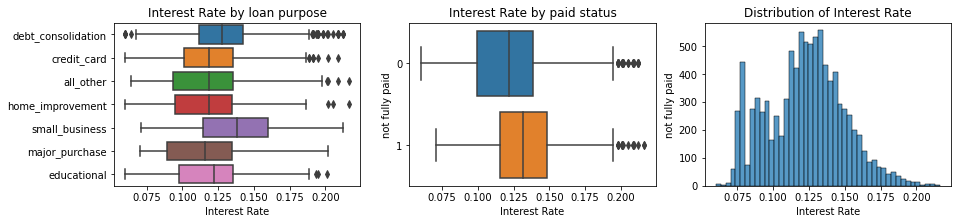

In [20]:
show_distribution('int_rate','Interest Rate')

In [21]:
"""
The first graph shows that the purpose of a loan does not affect its interest rate much, 
since we see the boxes at the same place for each purpose.
Loans for small businesses tend to have higher interest rates than the rest -> their average is higher than the 75th prcentile 
(the right edge of the box) of other purposes.

The second graph shows that the loans that were not fully paid back have slightly higher interest rates, 
but not by a significant amount.

In the third graph we see that the interest rates tend to follow a normal distribution with a lot of extra loans having 
rates lower than the average, skewing the distribution to the left a bit.
"""

'\nThe first graph shows that the purpose of a loan does not affect its interest rate much, \nsince we see the boxes at the same place for each purpose.\nLoans for small businesses tend to have higher interest rates than the rest -> their average is higher than the 75th prcentile \n(the right edge of the box) of other purposes.\n\nThe second graph shows that the loans that were not fully paid back have slightly higher interest rates, \nbut not by a significant amount.\n\nIn the third graph we see that the interest rates tend to follow a normal distribution with a lot of extra loans having \nrates lower than the average, skewing the distribution to the left a bit.\n'

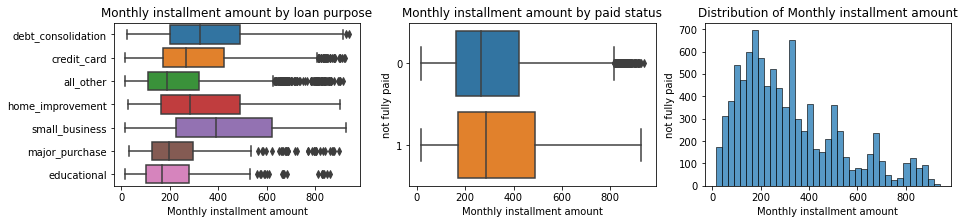

In [22]:
show_distribution('installment', "Monthly installment amount")

In [23]:
"""
FIRST GRAPH
We can see that the installment amount changes related to the pupose of the loan, with loans for small businesses, 
debt consolidation & home improvement having the highest range of installements.
"""

'\nFIRST GRAPH\nWe can see that the installment amount changes related to the pupose of the loan, with loans for small businesses, \ndebt consolidation & home improvement having the highest range of installements.\n'

In [24]:
# seperate loans for small business from others and show summary statistics:
df_clean.groupby(by=lambda x: df_clean.loc[x].purpose == 'small_business', sort=False)['installment'].describe().round().rename({0:"Others",1:"Small Business"})

,count,mean,std,min,25%,50%,75%,max
Others,8957.0,311.0,202.0,16.0,162.0,263.0,414.0,940.0
Small Business,617.0,433.0,248.0,16.0,225.0,393.0,624.0,927.0


In [25]:
"""
Now it is more obvious: although the min & max of them are practically the same between the two groups, 
the mean amount of monthly installment amounts is 
$120 higher for small business loans.
"""

'\nNow it is more obvious: although the min & max of them are practically the same between the two groups, \nthe mean amount of monthly installment amounts is \n$120 higher for small business loans.\n'

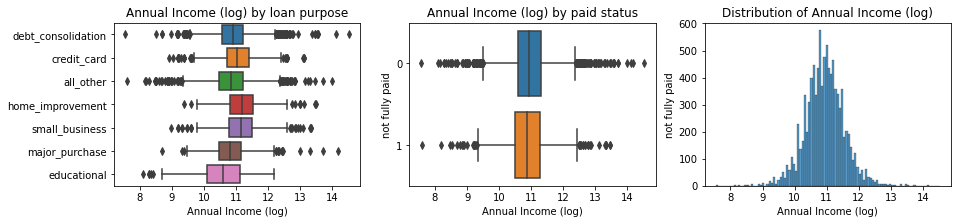

In [26]:
show_distribution('log_annual_inc', 'Annual Income (log)')

In [27]:
"""
There is nothing to observe here, the feature is normally distributed as expected.
"""

'\nThere is nothing to observe here, the feature is normally distributed as expected.\n'

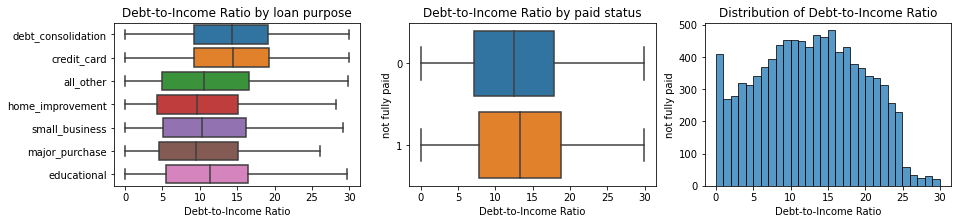

In [28]:
show_distribution('dti', 'Debt-to-Income Ratio')

In [29]:
"""
The dti does not seem to greatly affect whether a loan is fully paid back or not
"""

'\nThe dti does not seem to greatly affect whether a loan is fully paid back or not\n'

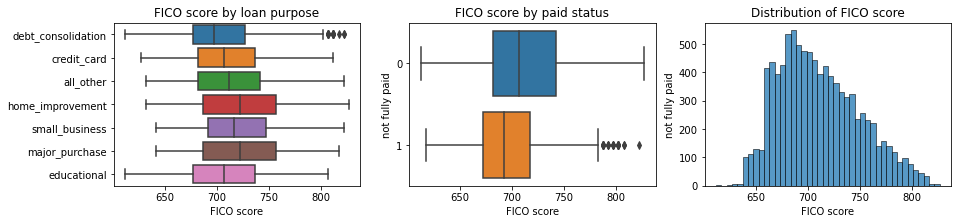

In [30]:
show_distribution('fico', "FICO score")

In [31]:
"""
it seems like people paying back their loans have higher FICO scores
"""

'\nit seems like people paying back their loans have higher FICO scores\n'

In [32]:
#Conclusions of exploratory analysis
"""
people that do not meet credit criteria are more prone to not pay back a loan
the purpose of a loan is related to paid-back status
loans for small businesses tend to have higher interest rates
loans for small businesses and debt consolidation have the highest installements
small business loans have $120 higher installments than other loans, on average
log of income does not relate to fully-paid status
dti does not greatly relate to fully-paid status
higher FICO scores indicate fully-paid back loans
"""

'\npeople that do not meet credit criteria are more prone to not pay back a loan\nthe purpose of a loan is related to paid-back status\nloans for small businesses tend to have higher interest rates\nloans for small businesses and debt consolidation have the highest installements\nsmall business loans have $120 higher installments than other loans, on average\nlog of income does not relate to fully-paid status\ndti does not greatly relate to fully-paid status\nhigher FICO scores indicate fully-paid back loans\n'

# QUESTION 1: - Find out what kind of people take a loan for what purposes.

In [33]:
#preparing the dataset for KMeans Clustering
df_clustering = df_clean[['log_annual_inc', 'dti', 'fico']]

#scale the dataset values for clustering
df_clustering = StandardScaler().fit_transform(df_clustering)

In [34]:
inertias = []
for k in range(1,11):
    km=KMeans(k)
    km.fit(df_clustering)
    inertias.append(km.inertia_)

Text(0, 0.5, 'inertias')

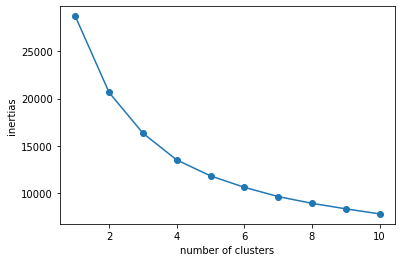

In [35]:
#plot the inertias to use the elbow method
plt.plot(range(1,11), inertias, marker='o')
plt.xlabel('number of clusters')
plt.ylabel('inertias')

In [36]:
"""
Lets divide the cluster in 3 for simplicity's sake
"""

"\nLets divide the cluster in 3 for simplicity's sake\n"

In [37]:
#fit the chosen KMeans model for 3 clusters
km = KMeans(3, random_state=42)
km.fit(df_clustering)

#add the cluster labels to the dataframe
df_clean['cluster'] = km.labels_

df_clean.groupby('cluster')[PERSON].mean()

,log_annual_inc,dti,fico,inq_last_6mths,delinq_2yrs,pub_rec
cluster,,,,,,
0,11.256652,8.199747,751.667605,1.311994,0.068238,0.022863
1,10.967790,18.769314,696.078883,1.686428,0.179569,0.072513
2,10.526138,7.836938,689.816157,1.690449,0.241978,0.087958


In [38]:
"""
The three last features have little differences between clusters; these qualities are defined after taking the loan, 
anyway, so will not be taken into account:

CLUSTER 0 - 'TRUSTHWORTHY' - Highest income in the set, also the highest fico and normal dti
CLUSTER 1 - 'DEBTORS' - Highest dti and average annual income and fico score
CLUSTER 2 - 'HIGH RISK' - Lowest income in the set, lowest dti and fico
"""

"\nThe three last features have little differences between clusters; these qualities are defined after taking the loan, \nanyway, so will not be taken into account:\n\nCLUSTER 0 - 'TRUSTHWORTHY' - Highest income in the set, also the highest fico and normal dti\nCLUSTER 1 - 'DEBTORS' - Highest dti and average annual income and fico score\nCLUSTER 2 - 'HIGH RISK' - Lowest income in the set, lowest dti and fico\n"

Text(0.5, 1.0, 'Number of loan by clusters and purpose')

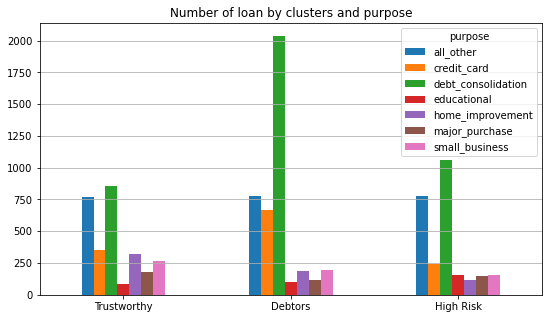

In [39]:
#plot the loan puposes for each cluster

pd.crosstab(df_clean.cluster, df_clean.purpose).rename({0: 'Trustworthy', 1: 'Debtors', 2: 'High Risk'}).plot.bar(figsize=(9,5),
                                                                                                                  rot=0, sort_columns=False,)
plt.grid(axis='y')
plt.xlabel("")
plt.title('Number of loan by clusters and purpose')

In [40]:
#ANSWER 1
"""
DEBTORS - take loans mostly to consolidate and fund theis credit card;
TRUSTWORTHY - expand their business or enjoy their good status with home 
improvements and major purchase, almost twice as much as the other clusters;
HIGH RISK - taking loans for a mix purpose, but much more about educational 
purposes.
"""

'\nDEBTORS - take loans mostly to consolidate and fund theis credit card;\nTRUSTWORTHY - expand their business or enjoy their good status with home \nimprovements and major purchase, almost twice as much as the other clusters;\nHIGH RISK - taking loans for a mix purpose, but much more about educational \npurposes.\n'

In [41]:
df_clean.groupby('cluster')['not_fully_paid'].mean().round(3)

cluster
0    0.105
1    0.177
2    0.193
Name: not_fully_paid, dtype: float64

In [42]:
"""
As expected, the "Trustworthy" cluster (0) had only 10.5% of their loans 
not fully paid back, whereas for the "High risk" cluster the ratio is 
almost double, 19.3%
"""

'\nAs expected, the "Trustworthy" cluster (0) had only 10.5% of their loans \nnot fully paid back, whereas for the "High risk" cluster the ratio is \nalmost double, 19.3%\n'

# QUESTION 2: How long does it take to payback a loan?

In [43]:
"""
The best one seems to be days_with_cr_line assuming that the person 
has credit line for as long as the loan exists. We will only 
consider the loans that are fully paid back 
"""

'\nThe best one seems to be days_with_cr_line assuming that the person \nhas credit line for as long as the loan exists. We will only \nconsider the loans that are fully paid back \n'

In [44]:
paid_back = df_clean.query('not_fully_paid  == 0')
#paid_back = df_clean[df_clean['not_fully_paid']  == 0]
paid_back.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,cluster
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,2
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1


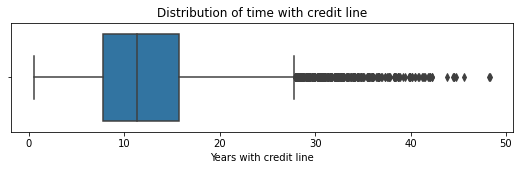

In [45]:
plt.figure(figsize=(9,2))
sns.boxplot(x= paid_back.days_with_cr_line / 365)
plt.xlabel('Years with credit line')
plt.title('Distribution of time with credit line');

In [46]:
"""
The boxplot show that most people have a credit line for 8-15 years (blue box),
with the average being around 11 years. 
Only 5% have credit lines for periods longer than 27 years.
"""

'\nThe boxplot show that most people have a credit line for 8-15 years (blue box),\nwith the average being around 11 years. \nOnly 5% have credit lines for periods longer than 27 years.\n'

Text(0.5, 1.0, 'Distribution of time with credit line by loan purpose')

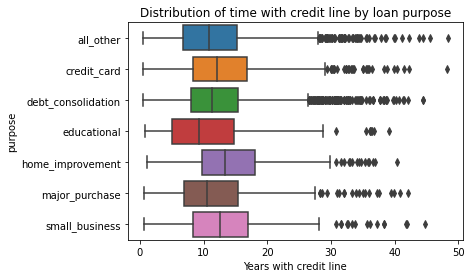

In [47]:
sns.boxplot(x=paid_back.days_with_cr_line/365, y=paid_back['purpose'].astype('category'))
plt.xlabel('Years with credit line')
plt.title('Distribution of time with credit line by loan purpose')

In [48]:
"""
All purpose have the some distribution of ime with credit time line, more or
less.
"""

'\nAll purpose have the some distribution of ime with credit time line, more or\nless.\n'

Text(0.5, 1.0, 'Distribution of time with credit line by cluster')

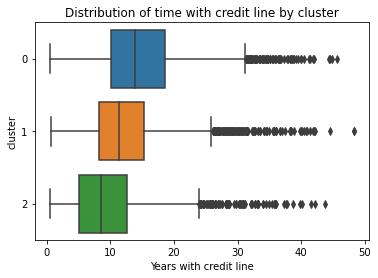

In [49]:
sns.boxplot(x=paid_back.days_with_cr_line/365, y=paid_back['cluster'].astype('category'))
plt.xlabel('Years with credit line')
plt.title('Distribution of time with credit line by cluster')

In [50]:
#Answer 2:
"""
According to the data available, a loan is generally paid back in 8-15 years,
with average being 11 years.
The purpose of the loan does not seem to affect the pay back time, but the
quality of the person taking the loan does: higher risk loans tend to be
paid back sooner, because the have shorter credit lines.
"""

'\nAccording to the data available, a loan is generally paid back in 8-15 years,\nwith average being 11 years.\nThe purpose of the loan does not seem to affect the pay back time, but the\nquality of the person taking the loan does: higher risk loans tend to be\npaid back sooner, because the have shorter credit lines.\n'

# QUESTION 3: Predict the probability a user will be able to pay back their loan

In [51]:
#Naive Training
NUMERIC = ["int_rate", "installment", "log_annual_inc", "dti", "fico",]
TARGET = ["not_fully_paid"]

X = df_clean[NUMERIC]
y= df_clean[TARGET]

X_train_naive, X_test_naive, y_train, y_test = train_test_split(X, y, random_state=42)

In [52]:
"""
Train models for benchmarking
We will train four models for classification:

Logistic Regression
Random Forest Classifier
SVC
XGBClassifier

Since the dataset is highly imbalanced (class 1, i.e. "not fully paid" is only 16%), 
the training will be made with a special argument for class_weights.

"""

'\nTrain models for benchmarking\nWe will train four models for classification:\n\nLogistic Regression\nRandom Forest Classifier\nSVC\nXGBClassifier\n\nSince the dataset is highly imbalanced (class 1, i.e. "not fully paid" is only 16%), \nthe training will be made with a special argument for class_weights.\n\n'

In [53]:
# show the ratios of target features:
df_clean.not_fully_paid.value_counts(normalize=True).round(2)

0    0.84
1    0.16
Name: not_fully_paid, dtype: float64

In [54]:
#train the models
# Logistic Regression
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train_naive, y_train)

rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train_naive, y_train)

svc = SVC(class_weight='balanced', probability = True)
svc.fit(X_train_naive, y_train)

xgb = XGBClassifier(scale_pos_weight = 5.25, n_jobs=-1, verbose=0)
xgb.fit(X_train_naive, y_train)

[09:37:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:37:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5.25, subsample=1,
              tree_method='exact', validate_parameters=1, verbose=0,
              verbosity=None)

In [55]:
"""
Evaluation of models
For imbalanced sets, accuracy is not a good metric: consider a model that always predicts "class 0" (fully paid loan); 
in our case, this model will be correct 85% of the time, i.e. it would have a high accuracy of 85%, 
although it would miss all possible not fully paid loans, which is our objective.

The standard score to use for imbalanced sets is roc_auc. 
Additionally recall & f1 score will be used, with accuracy for reference. 
Recall is the model's ability to not miss positives, while F1 score is the balance between recall & precision.
"""

'\nEvaluation of models\nFor imbalanced sets, accuracy is not a good metric: consider a model that always predicts "class 0" (fully paid loan); \nin our case, this model will be correct 85% of the time, i.e. it would have a high accuracy of 85%, \nalthough it would miss all possible not fully paid loans, which is our objective.\n\nThe standard score to use for imbalanced sets is roc_auc. \nAdditionally recall & f1 score will be used, with accuracy for reference. \nRecall is the model\'s ability to not miss positives, while F1 score is the balance between recall & precision.\n'

In [56]:
def show_scores(models, X_train, y_train, X_test, y_test):
    
    scores = []
    
    for m in models:
        y_pred_train = m.predict(X_train)
        y_pred_test = m.predict(X_test)
        y_pred_proba_train = m.predict_proba(X_train)
        y_pred_proba_test = m.predict_proba(X_test)
        name = f'{m}'.split("(")[0]
        
        scores.append([name, 'roc_auc', 'train', roc_auc_score(y_train, y_pred_proba_train[:,1])])
        scores.append([name, 'roc_auc', 'test', roc_auc_score(y_test, y_pred_proba_test[:,1])])
        
        scores.append([name, 'recall', 'train', recall_score(y_train, y_pred_train)])
        scores.append([name, 'recall', 'test', recall_score(y_test, y_pred_test)])
        
        scores.append([name, 'f1', 'train', f1_score(y_train, y_pred_train)])
        scores.append([name, 'f1', 'test', f1_score(y_test, y_pred_test)])
        
        scores.append([name, 'accuracy', 'train', accuracy_score(y_train, y_pred_train)])
        scores.append([name, 'accuracy', 'test', accuracy_score(y_test, y_pred_test)])
        
    
    scores_df = pd.DataFrame(scores, columns=['model_name', 'metric', 'set', 'score'])
    sns.catplot(data=scores_df.query("set == 'test'"), y='model_name', x='score', col='metric', kind='bar')
    display(scores_df.pivot(index='model_name', columns=['metric', 'set'], values='score').round(2))
    
    return scores_df

metric                 roc_auc       recall          f1       accuracy      
set                      train  test  train  test train  test    train  test
model_name                                                                  
LogisticRegression        0.63  0.65   0.62  0.61  0.31  0.31     0.56  0.56
RandomForestClassifier    1.00  0.58   1.00  0.02  1.00  0.04     1.00  0.83
SVC                       0.62  0.63   0.72  0.72  0.31  0.33     0.49  0.50
XGBClassifier             0.99  0.59   0.98  0.27  0.83  0.24     0.94  0.72

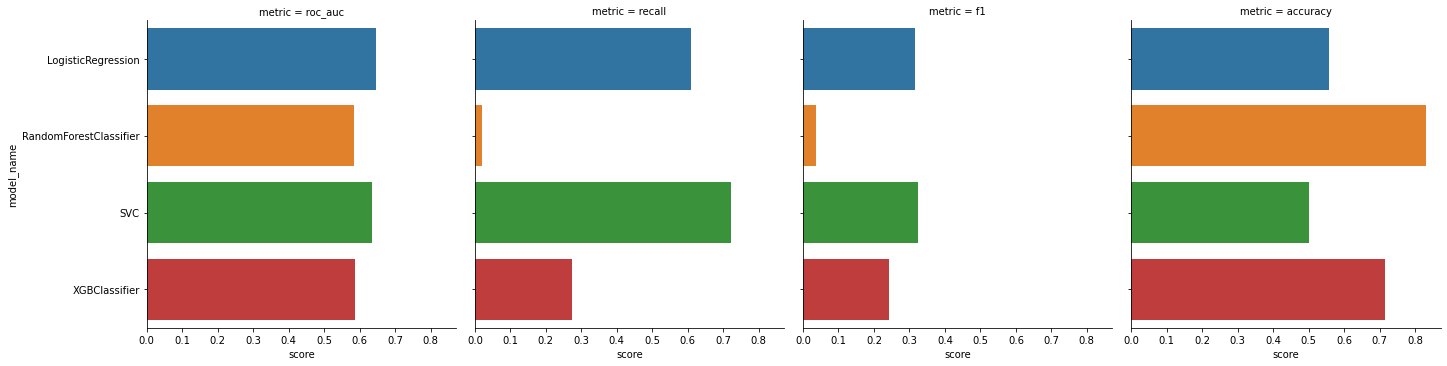

In [57]:
scores_naive = show_scores([lr, rf, svc, xgb], X_train_naive, y_train, X_test_naive, y_test)

scores = scores_naive.rename({"score":"naive"},axis=1)

In [58]:
"""
Logistic and SVC models had the best roc_auc score for the test set. 
The RandomForest classifier has the highest accuracy but is dreadfully low on recall & f1;
"""

'\nLogistic and SVC models had the best roc_auc score for the test set. \nThe RandomForest classifier has the highest accuracy but is dreadfully low on recall & f1;\n'

In [59]:
"""
The scaler used is MinMaxScaler, because ultimately the training set will include several binary variables.
"""

'\nThe scaler used is MinMaxScaler, because ultimately the training set will include several binary variables.\n'

[09:38:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:38:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


metric                 roc_auc       recall          f1       accuracy      
set                      train  test  train  test train  test    train  test
model_name                                                                  
LogisticRegression        0.63  0.65   0.62  0.61  0.31  0.32     0.56  0.57
RandomForestClassifier    1.00  0.59   1.00  0.02  1.00  0.03     1.00  0.83
SVC                       0.67  0.65   0.68  0.65  0.34  0.35     0.58  0.59
XGBClassifier             0.99  0.59   0.98  0.27  0.83  0.24     0.94  0.72

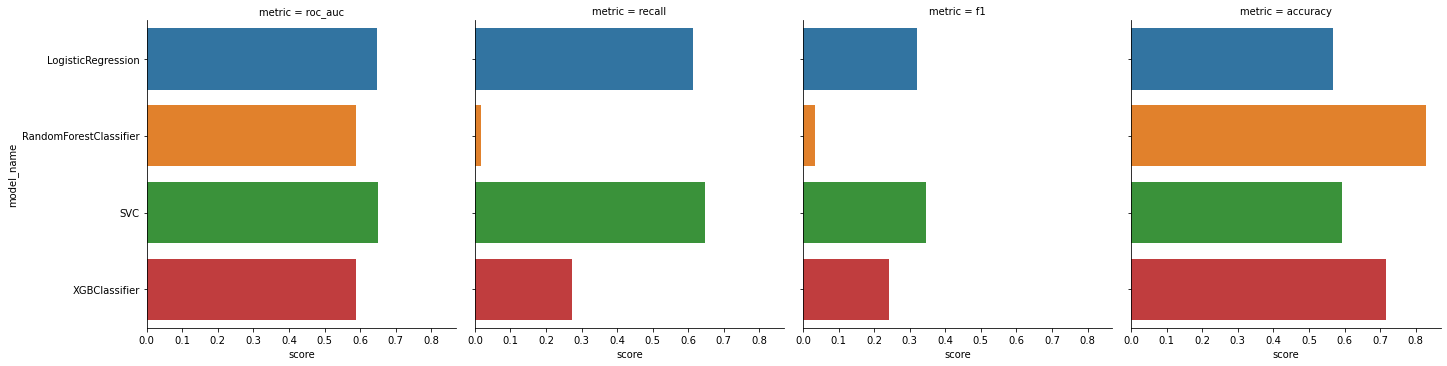

In [60]:
# scales X_train, X_test

scaler = StandardScaler()
#scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train_naive)
X_test_scaled = scaler.transform(X_test_naive)

lr_scaled = LogisticRegression(class_weight='balanced')
lr_scaled.fit(X_train_scaled, y_train)

rf_scaled = RandomForestClassifier(class_weight='balanced')
rf_scaled.fit(X_train_scaled, y_train)

svc_scaled = SVC(class_weight='balanced', probability = True)
svc_scaled.fit(X_train_scaled, y_train)

xgb_scaled = XGBClassifier(scale_pos_weight = 5.25, n_jobs=-1, verbose=0)
xgb_scaled.fit(X_train_scaled, y_train)

scores_scaled = show_scores([lr_scaled, rf_scaled, svc_scaled, xgb_scaled], X_train_scaled, y_train, X_test_scaled, y_test)
scores = scores.assign(scaled=scores_scaled.score)

In [61]:
"""
SVC calissifier has the same roc_auc score as LogisticRegression, an improvement over the previous set. 
SVC is also equal or better than Logistic in al lother scores as well, and seems like the best candidate so far.
"""

'\nSVC calissifier has the same roc_auc score as LogisticRegression, an improvement over the previous set. \nSVC is also equal or better than Logistic in al lother scores as well, and seems like the best candidate so far.\n'

In [62]:
"""
NEXT STEPS
. ADD more features;
. Convert Categorical features 
. Scale the features as before
. add the interactions between features, to capture how the 
combination of two features might affect the probability of the 
target.
Use the PolynomialFeatures transformer, which creates all possible
combinations of two features.

High Correlation - from 0.4 to 1 or -1 to -0.4.

"""

'\nNEXT STEPS\n. ADD more features;\n. Convert Categorical features \n. Scale the features as before\n. add the interactions between features, to capture how the \ncombination of two features might affect the probability of the \ntarget.\nUse the PolynomialFeatures transformer, which creates all possible\ncombinations of two features.\n\nHigh Correlation - from 0.4 to 1 or -1 to -0.4.\n\n'

In [63]:
cors = df_clean.corrwith(df_clean.not_fully_paid)
cors[PERSON].index

Index(['log_annual_inc', 'dti', 'fico', 'inq_last_6mths', 'delinq_2yrs',
       'pub_rec'],
      dtype='object')

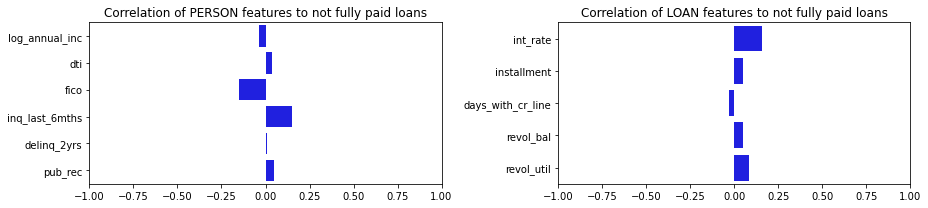

In [64]:
fig, axes = plt.subplots(1,2, figsize=(13,3), )
axes[0].set_xlim(-1,1)
axes[0].set_title('Correlation of PERSON features to not fully paid loans')
axes[1].set_xlim(-1,1)
axes[1].set_title('Correlation of LOAN features to not fully paid loans')

cors = df_clean.corrwith(df_clean.not_fully_paid)
sns.barplot(x=cors[PERSON], y=cors[PERSON].index, ax=axes[0], color='blue')
sns.barplot(x=cors[LOAN], y=cors[LOAN].index, ax=axes[1], color='blue')
plt.tight_layout()

In [65]:
"""
Unfortunately, there is no feature with either positive or negative
correlation higher than 0.2.
"""

'\nUnfortunately, there is no feature with either positive or negative\ncorrelation higher than 0.2.\n'

In [66]:
NUMERIC = ["int_rate", "installment", "log_annual_inc", "dti", "fico", "credit_policy", "days_with_cr_line", "revol_util", "inq_last_6mths" ]
TARGET = ["not_fully_paid"]
CATEGORIC = ["purpose", "cluster"]

# add features
df_model = df_clean[NUMERIC + CATEGORIC]

# convert categoricals
df_model = pd.get_dummies(df_model, columns=CATEGORIC, drop_first=False)

# scale the set
df_model = MinMaxScaler().fit_transform(df_model)

# add feature interactions
df_model = PolynomialFeatures(2, interaction_only=True).fit_transform(df_model)

In [67]:
X = df_model
y = df_clean[TARGET]

# split the set to train and test sets
X_train_eng, X_test_eng, y_train, y_test = train_test_split(X, y, random_state=42)

[09:39:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


metric                 roc_auc       recall          f1       accuracy      
set                      train  test  train  test train  test    train  test
model_name                                                                  
LogisticRegression        0.69  0.70   0.63  0.62  0.36  0.37     0.64  0.65
RandomForestClassifier    1.00  0.66   1.00  0.02  1.00  0.03     1.00  0.83
SVC                       0.70  0.69   0.59  0.58  0.35  0.36     0.65  0.66
XGBClassifier             1.00  0.63   1.00  0.25  0.97  0.28     0.99  0.78

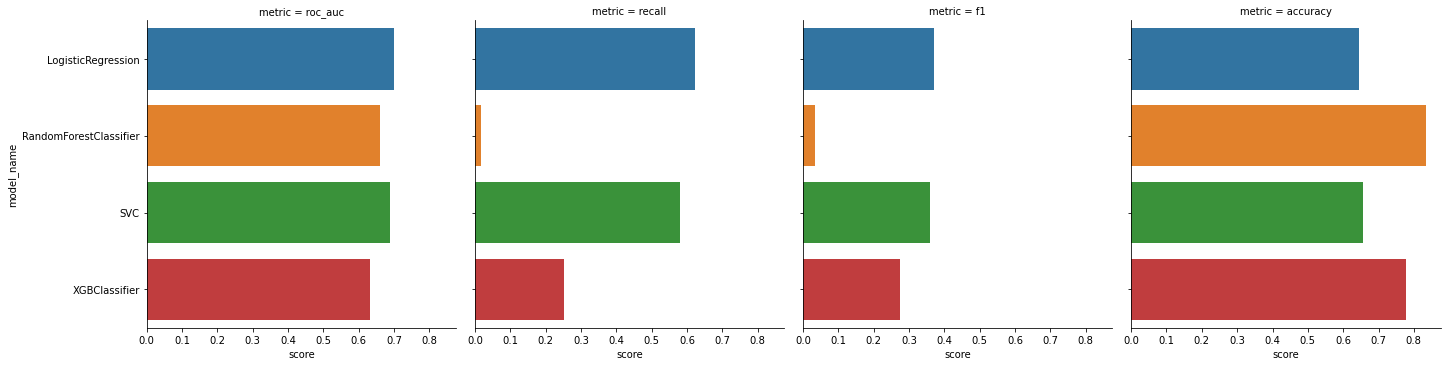

In [68]:
# dummies, poly, scaled X_train, X_test

lr_eng = LogisticRegression(class_weight='balanced')
lr_eng.fit(X_train_eng, y_train)

rf_eng = RandomForestClassifier(class_weight='balanced')
rf_eng.fit(X_train_eng, y_train)

svc_eng = SVC(class_weight='balanced', probability=True)
svc_eng.fit(X_train_eng, y_train)

xgb_eng = XGBClassifier(scale_pos_weight = 5.25, n_jobs=-1,)
xgb_eng.fit(X_train_eng, y_train)

scores_eng = show_scores([lr_eng, rf_eng, svc_eng, xgb_eng], X_train_eng, y_train, X_test_eng, y_test)
scores = scores.assign(eng=scores_eng.score)

In [69]:
"""
As expected, since our initial training dataset only had five features, adding more features resulted in better performance.
All four models haver better roc_auc scores. 
"""

'\nAs expected, since our initial training dataset only had five features, adding more features resulted in better performance.\nAll four models haver better roc_auc scores. \n'

In [83]:
# GridSearchCV

#LOGISTIC REGRESSION

"""
params_lr = {
    'C': np.arange(0.1, 1.3, 0.3),
    'max_iter': np.arange(50,2000, 100),
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
"""
params_lr = {
    'C': [0.4] ,
    'max_iter': [50],
    'penalty': ['l1'],
    'solver': ['sag', 'saga']
}


lr_cv = GridSearchCV(estimator=LogisticRegression(class_weight='balanced'),
                     param_grid=params_lr,
                     cv=3,
                     n_jobs = 1,
                     verbose=1,
                     scoring = 'roc_auc'                  
                    )

lr_cv.fit(X_train_eng, y_train)
best_params_lr = lr_cv.best_params_
print("Best params: ",best_params_lr)

#Best params:  {'C': 0.4, 'max_iter': 50, 'penalty': 'l1', 'solver': 'saga'}

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best params:  {'C': 0.4, 'max_iter': 50, 'penalty': 'l1', 'solver': 'saga'}


In [84]:
#RANDOM FOREST

params_rf = {
    'max_depth' : np.arange(3,9,1),
    'max_leaf_nodes' : np.arange(7,22,1),
    'min_samples_leaf': np.arange(1,5),
}

rf_cv = GridSearchCV(estimator= RandomForestClassifier(class_weight='balanced'),
                     param_grid=params_rf,
                     cv=3,
                     n_jobs=-1,
                     verbose=1,
                     scoring='roc_auc'
                    )

rf_cv.fit(X_train_eng, y_train)
best_params_rf = rf_cv.best_params_
print("Best params: ",best_params_rf)
#Best params:  {'max_depth': 7, 'max_leaf_nodes': 19, 'min_samples_leaf': 3}

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Best params:  {'C': 0.4, 'max_iter': 50, 'penalty': 'l1', 'solver': 'saga'}


In [86]:
#CVS

"""
params_svc = {
    'kernel' : [ 'linear', 'poly', 'rbf', 'sigmoid', ],
    'max_iter' : [-1,50000,100000,200000,300000],
    'gamma' : ['scale','auto', 0.001, 0.01, 0.1]
}
"""

params_svc = {
    'kernel' : [ 'linear'],
    'max_iter' : [-1],
    'gamma' : ['scale']
}


svc_cv = GridSearchCV(estimator=SVC(probability=True, class_weight='balanced', verbose=3),
                     param_grid=params_svc,
                     cv=3,
                     n_jobs=-1,
                     verbose=3,
                     scoring='roc_auc'
                     )

svc_cv.fit(X_train_eng, y_train)
best_params_svc = svc_cv.best_params_
print("Best params: ",best_params_svc)
#Best params:  {'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1}

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LibSVM]Best params:  {'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1}


In [88]:
#XGBClassifier

"""
params_xgb = {
    "max_depth": [4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.3, 0.6],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [ 4, 5, 6],
    "subsample": [0.6, 0.7, 0.8],
    "colsample_bytree": [0.5, 0.6, 0.7],
}
"""

params_xgb = {
    "max_depth": [4],
    "learning_rate": [0.01],
    "gamma": [0.6],
    "reg_lambda": [10],
    "scale_pos_weight": [ 4 ],
    "subsample": [0.7],
    "colsample_bytree": [0.5],
}


xgb_cv = GridSearchCV(estimator=XGBClassifier(scale_pos_weight = 0.1903518, n_jobs=-1, verbose=3),
                     param_grid=params_xgb,
                     cv=3,
                     n_jobs=-1,
                     verbose=3,
                     scoring='roc_auc'
                     )

xgb_cv.fit(X_train_eng, y_train)
best_params_xgb = xgb_cv.best_params_
print("Best params: ",best_params_xgb)
# Best params:  {'colsample_bytree': 0.5, 'gamma': 0.6, 'learning_rate': 0.01, 'max_depth': 4, 'reg_lambda': 10, 'scale_pos_weight': 4, 'subsample': 0.7}

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[10:09:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:09:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best params:  {'colsample_bytree': 0.5, 'gamma': 0.6, 'learning_rate': 0.01, 'max_depth': 4, 'reg_lambda': 10, 'scale_pos_weight': 4, 'subsample': 0.7}


In [89]:
# Train models with the best results from Grid Search

best_params_lr = {'C': 0.4, 'max_iter': 50, 'penalty': 'l1', 'solver': 'saga'}
best_params_rf =  {'max_depth': 6, 'max_leaf_nodes': 8, 'min_samples_leaf': 3}
best_params_svc = {'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1}
best_params_xgb = {'colsample_bytree': 0.5, 'gamma': 0.6, 'learning_rate': 0.01, 'max_depth': 4, 'reg_lambda': 10, 'scale_pos_weight': 4, 'subsample': 0.7}

In [91]:
### train models with the hyperparams found by GridSearchCV :

lr_cv = LogisticRegression(**best_params_lr, class_weight='balanced')
lr_cv.fit(X_train_eng , y_train)

rf_cv = RandomForestClassifier(**best_params_rf, class_weight='balanced')
rf_cv.fit(X_train_eng , y_train)

svc_cv = SVC(**best_params_svc, probability=True, class_weight='balanced')
svc_cv.fit(X_train_eng , y_train)

xgb_cv = XGBClassifier(**best_params_xgb)
xgb_cv.fit(X_train_eng , y_train)

[10:14:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.6, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=4, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

metric                 roc_auc       recall          f1       accuracy      
set                      train  test  train  test train  test    train  test
model_name                                                                  
LogisticRegression        0.68  0.71   0.62  0.63  0.35  0.37     0.63  0.65
RandomForestClassifier    0.69  0.69   0.62  0.59  0.36  0.37     0.66  0.66
SVC                       0.69  0.70   0.60  0.61  0.35  0.37     0.65  0.66
XGBClassifier             0.73  0.69   0.43  0.39  0.38  0.36     0.78  0.77

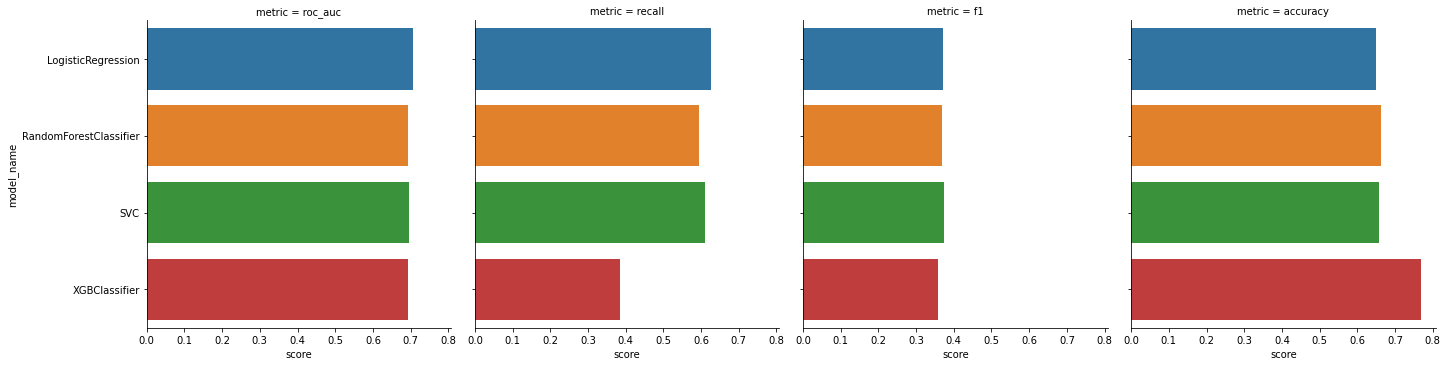

In [100]:
scores_best = show_scores([lr_cv, rf_cv, svc_cv, xgb_cv], X_train_eng, y_train, X_test_eng, y_test)
scores = scores.assign(cv=scores_best.score)

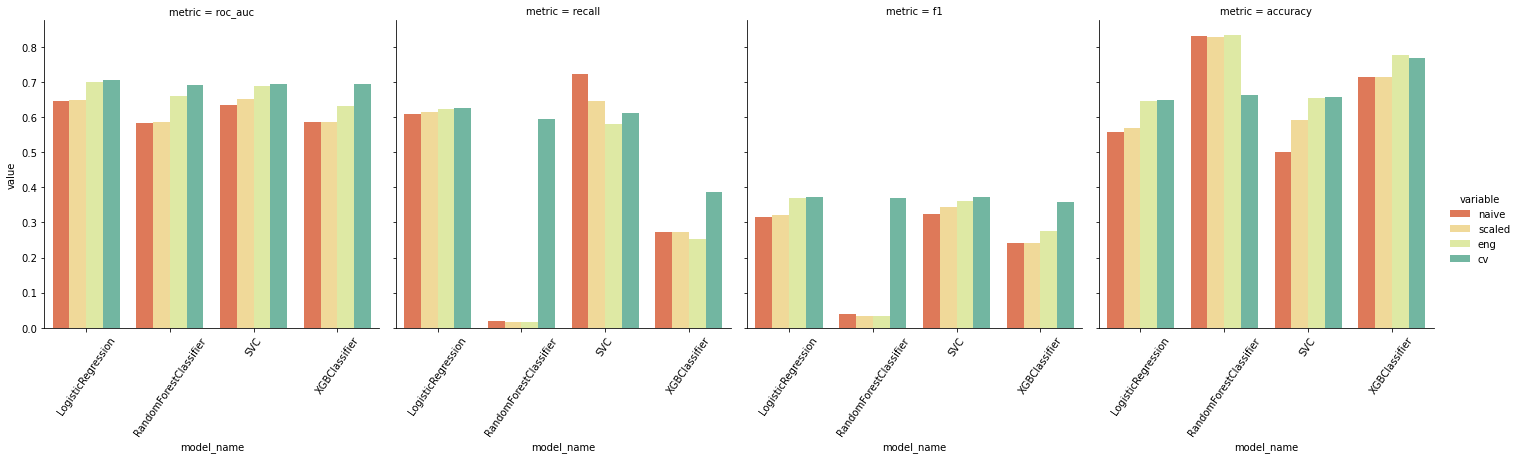

In [103]:
#Comparison of Results

g = sns.catplot(data = scores.melt(id_vars=['model_name', 'metric', 'set']).query('set == "test"'), y='value', x='model_name',
               col='metric', hue='variable', kind='bar', palette='Spectral')
g.set_xticklabels(rotation=55);

In [ ]:
"""
In general, it is obvious that the models trained with GridSearchCV have the
highest roc_auc scores and outperform the other models in the rest of the scores 
as well.
"""

In [106]:
# Calibrate each of the CV models

lr_cal = CalibratedClassifierCV(lr_cv, method='sigmoid', cv=3)
rf_cal = CalibratedClassifierCV(rf_cv, method='sigmoid', cv=3)
svc_cal = CalibratedClassifierCV(svc_cv, method='sigmoid', cv=3)
xgb_cal = CalibratedClassifierCV(xgb_cv, method='sigmoid', cv=3)

lr_cal.fit(X_train_eng, y_train)
rf_cal.fit(X_train_eng, y_train)
svc_cal.fit(X_train_eng, y_train)
xgb_cal.fit(X_train_eng, y_train)

[10:35:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:35:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:35:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=0.5,
                                                    gamma=0.6, gpu_id=-1,
                                                    importance_type='gain',
                                                    interaction_constraints='',
                                                    learning_rate=0.01,
                                                    max_delta_step=0,
                                                    max_depth=4,
                                                    min_child_weight=1,
                                                    missing=nan,
                                                    monotone_constrai

Text(0.5, 1.0, 'ROC curves for models')

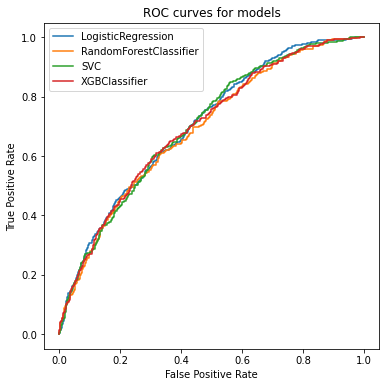

In [109]:
#plot roc curves

plt.figure(figsize=(6,6))
for model in [lr_cal, rf_cal, svc_cal, xgb_cal]:
    fpr, tpr, thres = roc_curve(y_test, model.predict_proba(X_test_eng)[:,1])
    
    plt.plot(fpr, tpr, label=f'{model.base_estimator}'.split('(')[0])
    
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for models')


In [ ]:
"""
The roc curve, the more area there is undera curve, the better the model
perfoms; the area under the curve is the roc_auc score we used before.
All models seem to perform equally well.

"""

<Figure size 432x288 with 0 Axes>

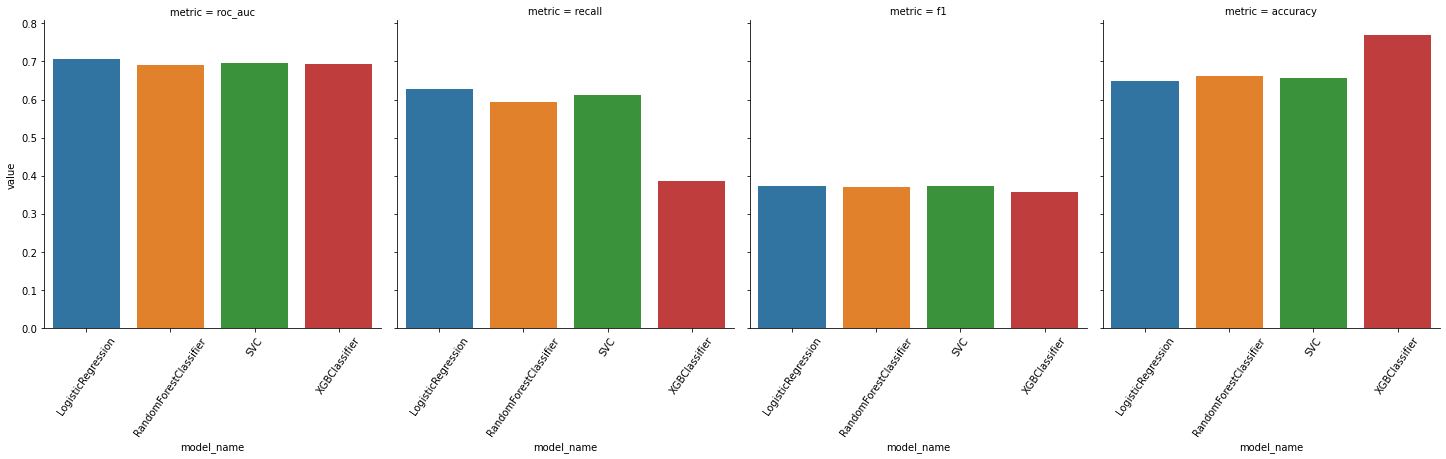

In [110]:
plt.figure(figsize=(6,4))
g = sns.catplot(data=scores.melt(id_vars=['model_name','metric','set']).query('set == "test" & variable=="cv"'), y='value', x='model_name', col='metric', kind='bar')
g.set_xticklabels(rotation=55);

In [113]:
# sort the models based on their roc_auc score for the test set:
scores.query('set=="test" & metric=="roc_auc"').sort_values(by='cv', ascending=False).round(2)

,model_name,metric,set,naive,scaled,eng,cv
1,LogisticRegression,roc_auc,test,0.65,0.65,0.70,0.71
17,SVC,roc_auc,test,0.63,0.65,0.69,0.70
25,XGBClassifier,roc_auc,test,0.59,0.59,0.63,0.69
9,RandomForestClassifier,roc_auc,test,0.58,0.59,0.66,0.69


In [114]:
# sort the models based on their roc_auc score for the test set:
scores.query('set=="test" & metric=="recall"').sort_values(by='cv', ascending=False).round(2)

,model_name,metric,set,naive,scaled,eng,cv
3,LogisticRegression,recall,test,0.61,0.61,0.62,0.63
19,SVC,recall,test,0.72,0.65,0.58,0.61
11,RandomForestClassifier,recall,test,0.02,0.02,0.02,0.59
27,XGBClassifier,recall,test,0.27,0.27,0.25,0.39


In [ ]:
"""
We can see by comparing the scores before and after calibration, that they 
did not change much. 

But the function of the calibration is to affects how the model predict 
probabilities are distributed and aligns them with the actual witnessed 
probabilities.
"""

(0.0, 1.0)

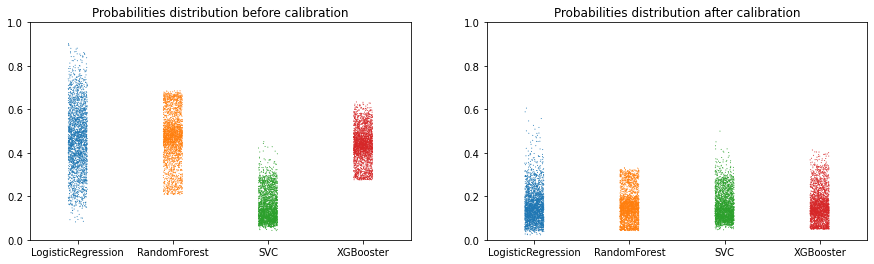

In [116]:
probas_cv = pd.DataFrame({
    "LogisticRegression" : lr_cv.predict_proba(X_test_eng)[:,1],
    "RandomForest" : rf_cv.predict_proba(X_test_eng)[:,1],
    "SVC":svc_cv.predict_proba(X_test_eng)[:,1],
    "XGBooster":xgb_cv.predict_proba(X_test_eng)[:,1]
})

#create a dataframe with the probabilities AFTER calibration
probas_cal = pd.DataFrame({
    "LogisticRegression" : lr_cal.predict_proba(X_test_eng)[:,1],
    "RandomForest" : rf_cal.predict_proba(X_test_eng)[:,1],
    "SVC":svc_cal.predict_proba(X_test_eng)[:,1],
    "XGBooster":xgb_cal.predict_proba(X_test_eng)[:,1]
})

#draw the stripplots
fig, axes = plt.subplots(1,2, figsize=(15,4))
sns.stripplot(data=probas_cv, size=1, ax=axes[0])
axes[0].set_title('Probabilities distribution before calibration')
axes[0].set_ylim(0,1)

sns.stripplot(data=probas_cal, size=1, ax=axes[1])
axes[1].set_title('Probabilities distribution after calibration')
axes[1].set_ylim(0,1)

In [ ]:
"""
Before the calibration, each model had some preference about the 
probabilities it produces: for example, XGBoooster never seems to be 
confident about its prediction, they all fall between 30% and 70% certainty.
SVC on the other hand is very confident about predicting class 0 and never 
goes above 50% confidence for class 1. Logistic, the best model seen, 
goes all the way up and down but never predicts with more than 90% 
confidence for either class.
"""

In [ ]:
#ANSWER 3

"""
The best model to predict the probability of a loan not being fully paid 
seems to be: LogisticRegression Classifier, with marginally better 
performance than SVC and Random Forest.

- Since the model predicts "not paid" and the question is about the 
probability of "being paid", we would have to select the model's probability
for class 0, instead of class 1.
- Also, the importance of hyper-parameter tuning was obvious, especially in 
the case of RandomForest, whose lousy performance in the beginning was 
catapulted after the tuning.
- Finally, the performance of even the best model is not very good; this was 
more or less expected from the beginning, when we saw absence of explanatory
strength for any features, no clear grouping, no correlation to the target 
feature, etc.
"""